In [3]:
import pandas as pd
import numpy as np
import os, pdb, sys, pickle
import matplotlib.pyplot as plt

with open('results_2.pkl', 'rb') as f: 
    dct = pickle.load(f)
print(dct.keys())
print(dct['chg_var'].keys())
dct['chg_var']['0.001-30'].head()

dict_keys(['chg_var', 'cov_shift', 'mix_shift'])
dict_keys(['0.0001-30', '0.001-30', '0.01-30', '0.1-30', '0.6-30', '1-30', '5-30', '10-30', '20-30', '30-30'])


,x1,x2,x3,y,time,pe
0,0.496714,1.399355,-0.675178,1.220891,0,0.0
1,-0.138264,0.924634,-0.144519,0.641851,1,0.0
2,0.647689,0.059630,-0.792420,-0.085101,2,0.0
3,1.523030,-0.646937,-0.307962,0.568132,3,0.0
4,-0.234153,0.698223,-1.893615,-1.429545,4,0.0


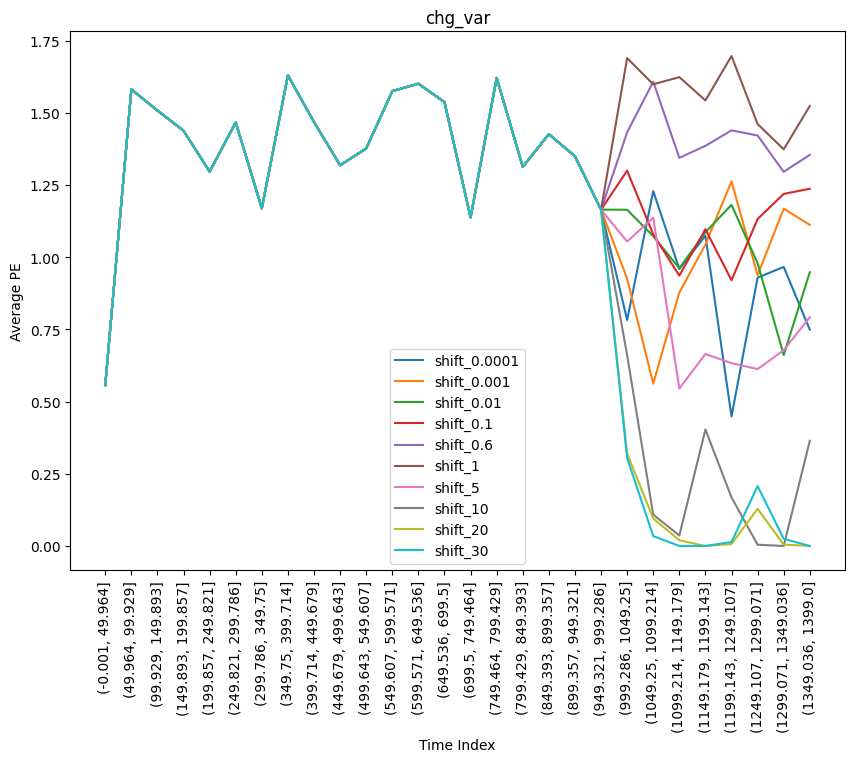

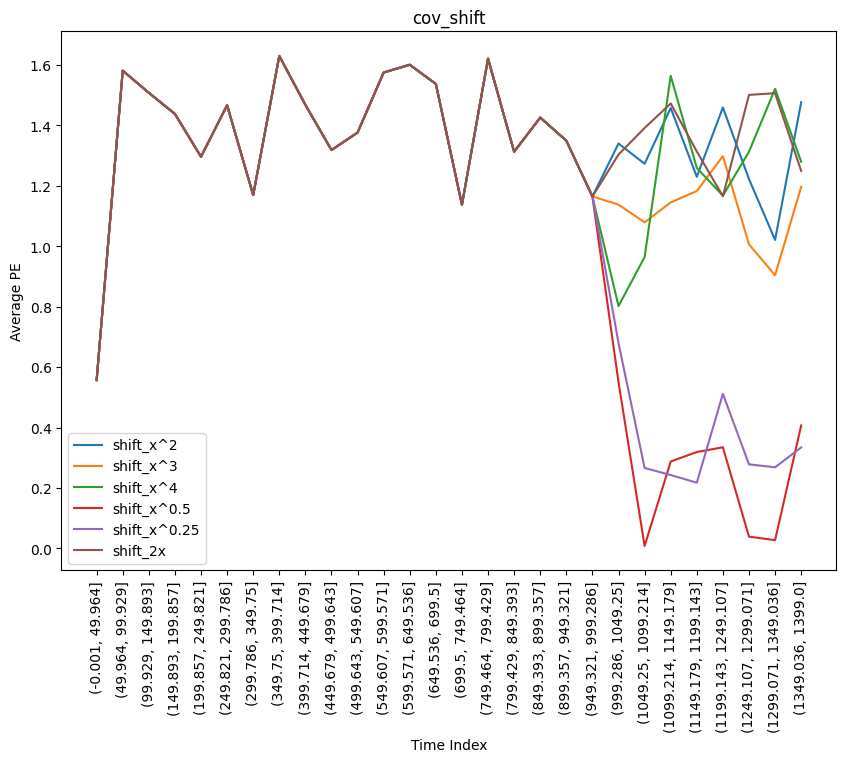

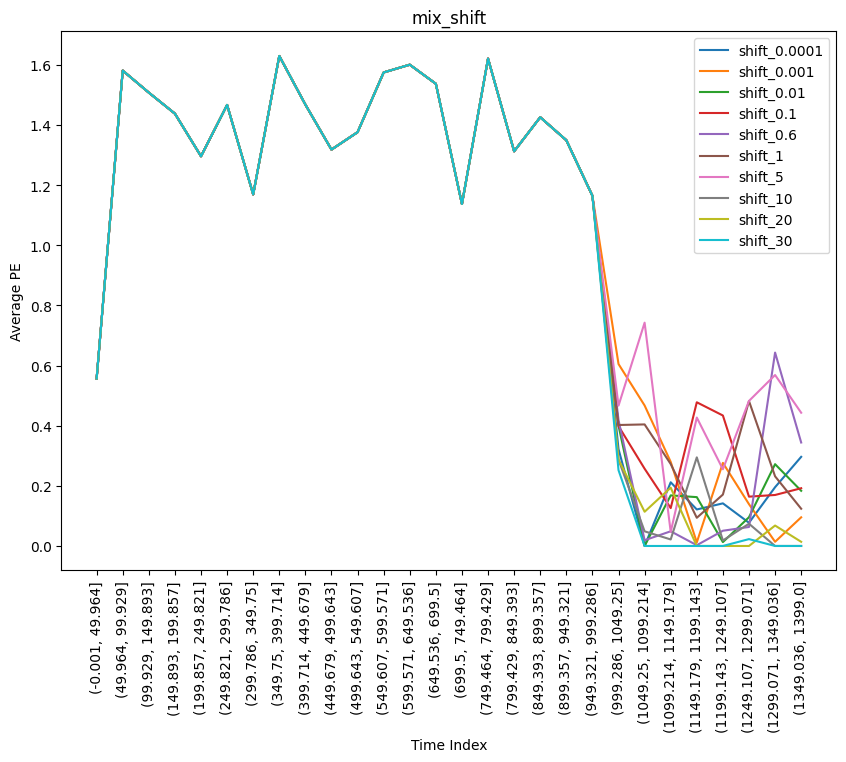

In [4]:
for typeOfShift in dct.keys(): 
    res = dct[typeOfShift]
    df = None
    for k in res.keys(): 
        if df is None: 
            df = res[k][['time', 'pe']]
            df.columns = ['time', 'shift_' + str(k).split('-')[0]]
        else: 
            tmp = res[k][['time', 'pe']]
            tmp.columns = ['time', 'shift_' + str(k).split('-')[0]]
            df = pd.merge(df, tmp, how = 'left', on = 'time')

    # Group Into Bins for Visualization
    df['time_bin'] = pd.qcut(df['time'], q = 28)
    df = df.groupby(['time_bin']).mean().reset_index()

    # Plot
    plt.figure(figsize=(10,7))
    for col in df.columns[2:]: 
        plt.plot(df.index, df[col], label = col)
    plt.ylabel('Average PE') 
    plt.xlabel('Time Index')
    plt.xticks(df.index, df['time_bin'], rotation = 90)
    plt.title(typeOfShift) 
    plt.legend()
    plt.show()
    plt.close()


    